## Model 2 Fit Results

In [1]:
setwd("/global/project/projectdirs/m1532/Projects_MVP/geospatial/GeoSpatial_Model/spatial-prediction")

In [2]:
library(CARBayesST)
library(tidyverse)

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [3]:
fit2 <- readRDS("outputs/model_results/fixedtime_model_2022-09-08.rds")

In [4]:
#get fips to keep 

# Note: United States total includes 3,006 counties;
## Loading dataset and geometries ###
vars <- read_csv("data/processed/combined.csv")
# change this to the number of years that 
# you are considering in your dataset.
NUMBER_OF_YEARS <- length(unique(vars$year))


county <- sf::read_sf(
    dsn = "data/shapefile/cb_2020_us_tract_500k",
    layer = "cb_2020_us_tract_500k"
)

county <- county %>%
    mutate(FIPSCODE = paste0(STATEFP, COUNTYFP)) %>% 
    arrange(FIPSCODE) %>%
    distinct(FIPSCODE, .keep_all = TRUE)

df <- county %>% inner_join(vars, on=FIPSCODE)

df_nona <- df %>% na.omit(suicide_rate) %>%
  group_by(FIPSCODE) %>% 
  mutate(name_count = n()) %>%
  ungroup() %>% 
  filter(name_count == NUMBER_OF_YEARS) %>% 
  dplyr::select(-name_count) %>%
  arrange(desc(year), FIPSCODE)

fips_to_keep <- df_nona %>% 
    distinct(FIPSCODE) %>% 
    pull(FIPSCODE)


Rows: 9089 Columns: 103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): FIPSCODE, county
dbl (101): deaths, ACS_PCT_GRP_QRT, ACS_PCT_PRIVATE_2, mean_temp, ACS_PCT_ME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“PROJ: proj_identify: Open of /global/homes/b/bbrusco/.conda/envs/r-venv/share/proj failed (GDAL error 1)”
Joining, by = "FIPSCODE"


In [5]:
str(fit2)

List of 10
 $ summary.results    : num [1:104, 1:7] -10.46 0 0 1.49 2.36 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:104] "(Intercept)" "ALAND" "AWATER" "ACS_PCT_GRP_QRT" ...
  .. ..$ : chr [1:7] "Mean" "2.5%" "97.5%" "n.sample" ...
 $ samples            :List of 8
  ..$ beta  : 'mcmc' num [1:70000, 1:99] -12.1 -12.1 -12.1 -12 -12.1 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ alpha : 'mcmc' num [1:70000, 1] -0.0624 -0.0624 -0.0681 -0.0681 -0.0681 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ phi   : 'mcmc' num [1:70000, 1:3029] -0.465 -0.464 -0.454 -0.456 -0.331 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ delta : 'mcmc' num [1:70000, 1:3029] 0.455 0.186 0.403 0.298 0.715 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ tau2  : 'mcmc' num [1:70000, 1:2] 0.338 0.321 0.338 0.333 0.332 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "tau2.int" "tau2.slo"
  .. ..- attr(*, "mcpar")= num [1:3] 1 7

In [5]:
fit2$summary.results

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-10.4573,-12.1540,-9.0986,70000,41.4,96.0,-2.7
ALAND,0.0000,0.0000,0.0000,70000,41.4,0.0,-Inf
AWATER,0.0000,0.0000,0.0000,70000,41.4,0.0,Inf
ACS_PCT_GRP_QRT,1.4852,0.6287,2.3227,70000,41.4,156.0,0.4
ACS_PCT_PRIVATE_2,2.3630,0.6900,4.0431,70000,41.4,917.8,-0.4
mean_temp,-0.0241,-0.2084,0.1590,70000,41.4,268.0,0.0
ACS_PCT_MEDICARE_ONLY,0.0163,-1.2272,1.2557,70000,41.4,318.2,3.5
ACS_PCT_PRIVATE_SELF,1.8529,1.1037,2.5381,70000,41.4,272.0,-0.8
ACS_PCT_MOBILE_HOME,0.3774,0.0120,0.7011,70000,41.4,151.1,0.6
NHC_DAILY_RES,-0.8626,-1.2591,-0.5192,70000,41.4,98.8,-1.5


In [6]:
length(fit2$fitted.values)

[1] 9087

In [7]:
length(fips_to_keep)

[1] 3029

In [8]:
str(fit2$samples)

List of 8
 $ beta  : 'mcmc' num [1:70000, 1:99] -12.1 -12.1 -12.1 -12 -12.1 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ alpha : 'mcmc' num [1:70000, 1] -0.0624 -0.0624 -0.0681 -0.0681 -0.0681 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ phi   : 'mcmc' num [1:70000, 1:3029] -0.465 -0.464 -0.454 -0.456 -0.331 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ delta : 'mcmc' num [1:70000, 1:3029] 0.455 0.186 0.403 0.298 0.715 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ tau2  : 'mcmc' num [1:70000, 1:2] 0.338 0.321 0.338 0.333 0.332 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "tau2.int" "tau2.slo"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ rho   : 'mcmc' num [1:70000, 1:2] 0.441 0.424 0.424 0.424 0.424 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "rho.int" "rho.slo"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ fitted: 'mcmc' num [1:70000, 1:9087] 9.04 9.89 9.23 9.43 9.15 ...
  ..- attr(*, "mcpar")= n

In [9]:
length(fit2$samples$rho)

[1] 140000

In [28]:
true_values <- read_csv("data/raw/suicide/2018.csv", show_col_types=F) %>%
        filter(fips %in% fips_to_keep) %>%
        arrange(fips) %>%
        select(Deaths) %>%
        pull()


In [29]:
fitted_values <- fit2$fitted[6059:9087]

In [30]:
results_df <- tibble(fitted_values = fitted_values, true_values = true_values, FIPSCODE = fips_to_keep)


In [31]:
head(results_df)

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
13.56079,11.00000,01001
40.88320,44.00000,01003
16.33542,14.00000,01005
46.57536,47.33333,01007
11.00114,10.00000,01009
24.59934,19.00000,01011


In [32]:
top_true <- results_df %>%
    arrange(desc(true_values)) %>%
    head(6) %>%
    mutate(top5_true = 1)

In [33]:
top_true

fitted_values,true_values,FIPSCODE,top5_true
<dbl>,<dbl>,<chr>,<dbl>
853.5600,947,06037,1
672.6854,737,04013,1
486.9012,481,48201,1
410.0783,465,32003,1
432.0675,459,17031,1
416.3312,448,06073,1


In [35]:
top_fitted <- results_df %>%
    arrange(desc(fitted_values)) %>%
    head(6)
top_fitted

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
853.5600,947,06037
672.6854,737,04013
486.9012,481,48201
432.0675,459,17031
416.3312,448,06073
410.0783,465,32003


# Residual Analysis

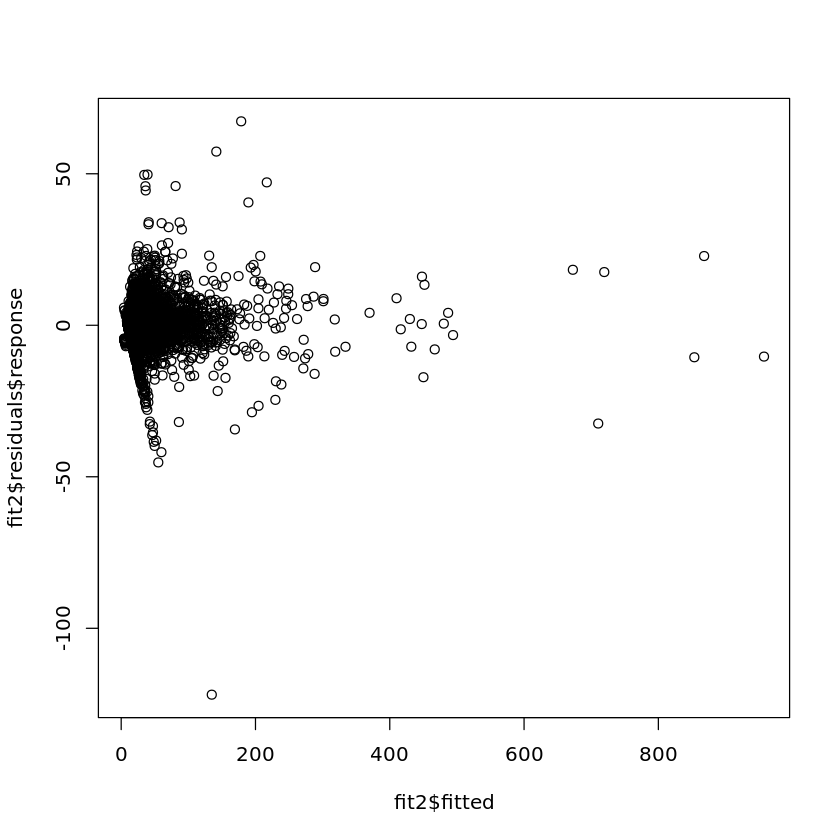

In [34]:
plot(fit2$fitted, fit2$residuals$response)

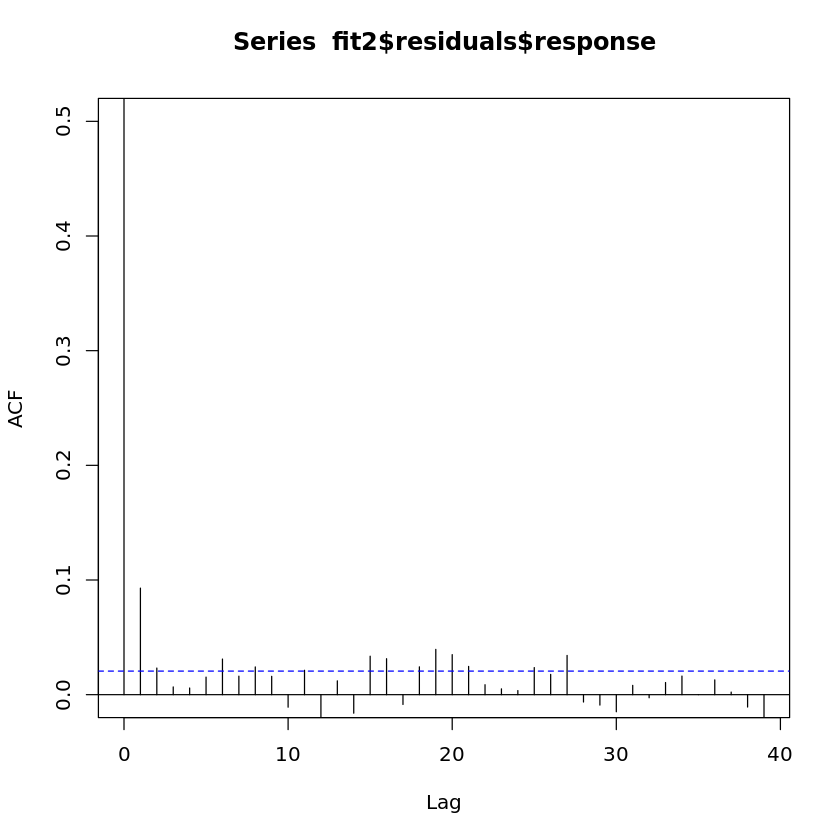

In [38]:
acf(fit2$residuals$response,ylim=c(0,0.5))

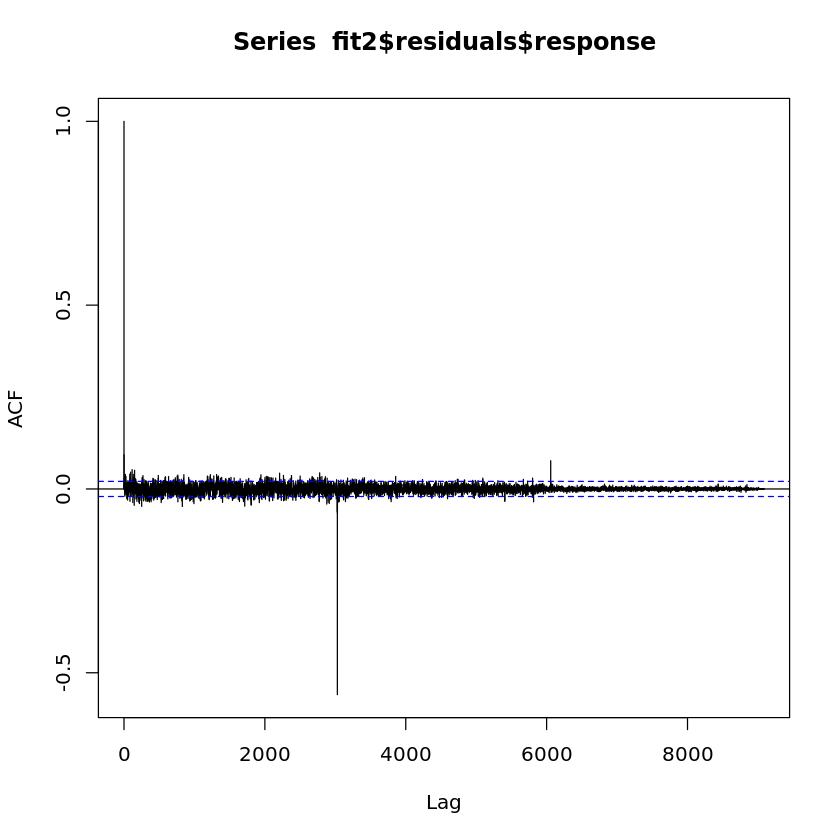

In [40]:
acf(fit2$residuals$response,"partial")
# correlation after AR1 is accounted for

# Coefficients
Order by effect size of the coefficient (note: coefficients have not been standardized)

In [58]:
fit2$summary %>%
    as_tibble(rownames=NA) %>%
    arrange(desc(abs(Mean)))

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.4573,-12.1540,-9.0986,70000,41.4,96.0,-2.7
ACS_PCT_TRICARE_VA,7.8825,-0.2995,15.8647,70000,41.4,5.5,2.7
ACS_PCT_UNINSURED,6.8593,2.9254,11.9641,70000,41.4,3.8,13.4
ACS_PCT_TRICARE_VA64,-5.7948,-12.7554,1.3657,70000,41.4,6.5,-2.9
CCBP_RATE_CS_PER_1000,-5.4911,-10.7442,-1.8487,70000,41.4,39.0,0.2
CHR_DENTISTS_NUM,5.3659,4.3049,6.7763,70000,41.4,2.1,-2.6
ACS_TOTAL_HOUSEHOLD,-5.3335,-6.6735,-4.3479,70000,41.4,2.0,2.6
ACS_PCT_UNINSURED64,-5.0558,-9.1668,-1.9105,70000,41.4,4.6,-14.2
ACS_PCT_PUBLIC_OTHER,3.9199,-0.2213,7.8187,70000,41.4,484.3,2.9


# RMSE

In [39]:
caret::RMSE(fitted_values,true_values)

[1] 13.2188